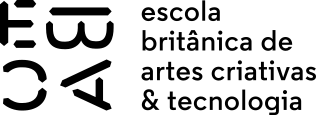





---


**Curso**: Ciência de dados;

**Módulo**: 10;

**Exercício**: 03;

**Futuro cientista de dados**: Lucas Cirilo dos Santos



---



# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [30]:
filepath = 'https://raw.githubusercontent.com/dslucascirilo/EBAC/main/Data%20Science/M%C3%B3dulo%2010%20-%20Descritiva%20II%20-%20An%C3%A1lise%20descritiva%20para%20resposta%20cont%C3%ADnua/Database/previsao_de_renda.csv'
df = pd.read_csv(filepath)

df = df.drop(columns='Unnamed: 0')
df.drop_duplicates(inplace=True)

df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [31]:
df['data_ref'] = pd.to_datetime(arg=df['data_ref'])

In [32]:
# Verificando variáveis qualitativas:

print(df.select_dtypes(include=['object', 'boolean']).columns)

# ou
#print(df.select_dtypes(exclude=['datetime', 'number']).columns)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')


In [33]:
quali = df.select_dtypes(include=['object', 'boolean']).columns

print(df[quali].info())
df[quali]

<class 'pandas.core.frame.DataFrame'>
Index: 14547 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sexo              14547 non-null  object
 1   posse_de_veiculo  14547 non-null  bool  
 2   posse_de_imovel   14547 non-null  bool  
 3   tipo_renda        14547 non-null  object
 4   educacao          14547 non-null  object
 5   estado_civil      14547 non-null  object
 6   tipo_residencia   14547 non-null  object
 7   mau               14547 non-null  bool  
dtypes: bool(3), object(5)
memory usage: 1.2+ MB
None


,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14994,M,True,True,Assalariado,Secundário,Casado,Casa,False
14995,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14998,F,False,True,Servidor público,Superior completo,Casado,Casa,False


**Avaliar Distribuição**

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


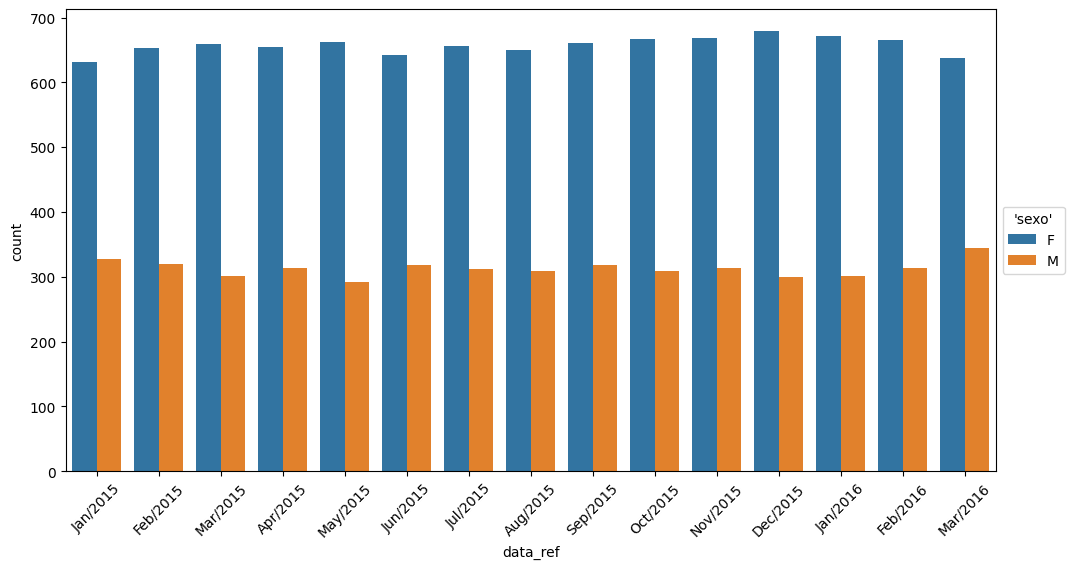

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


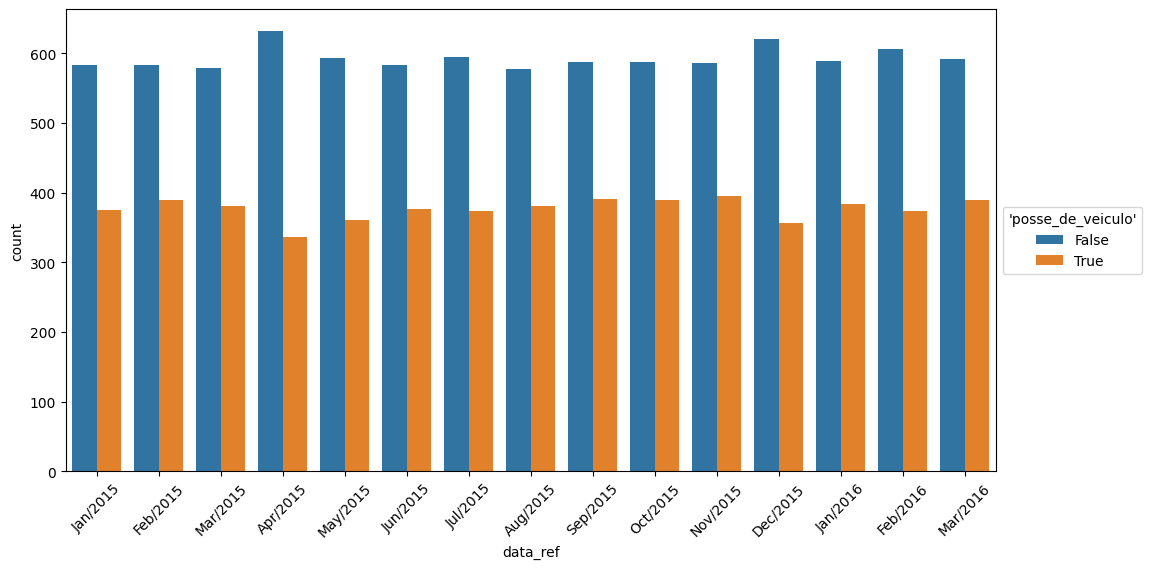

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


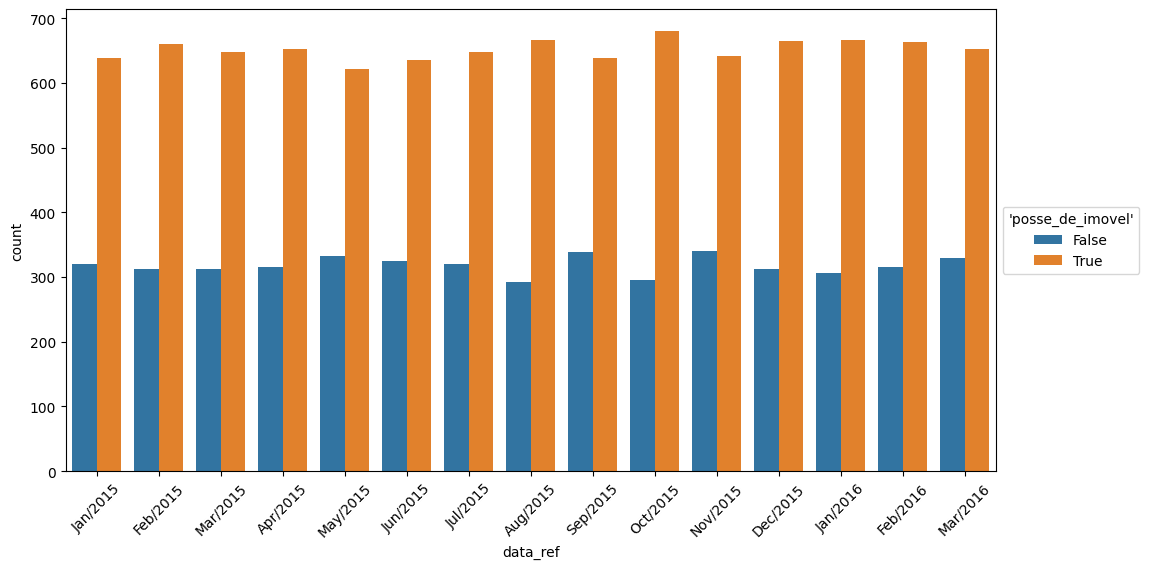

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


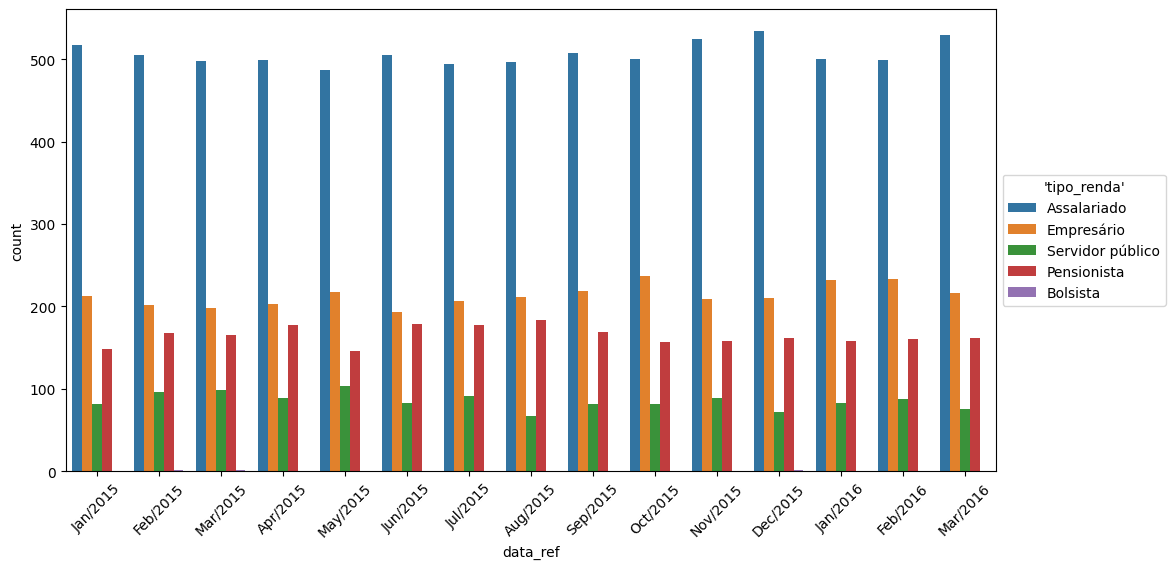

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


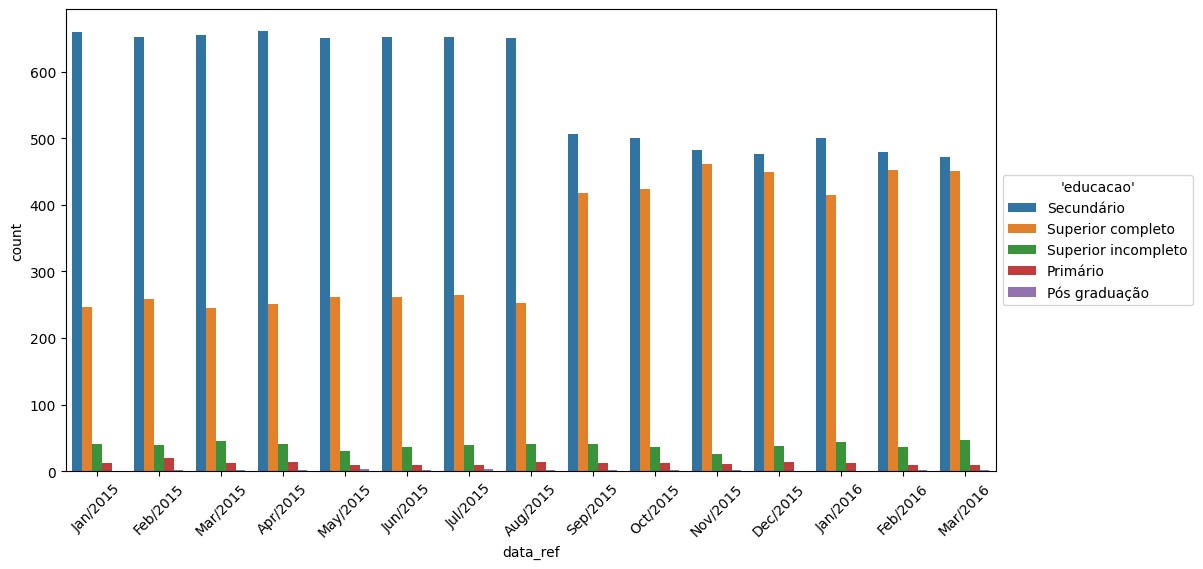

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


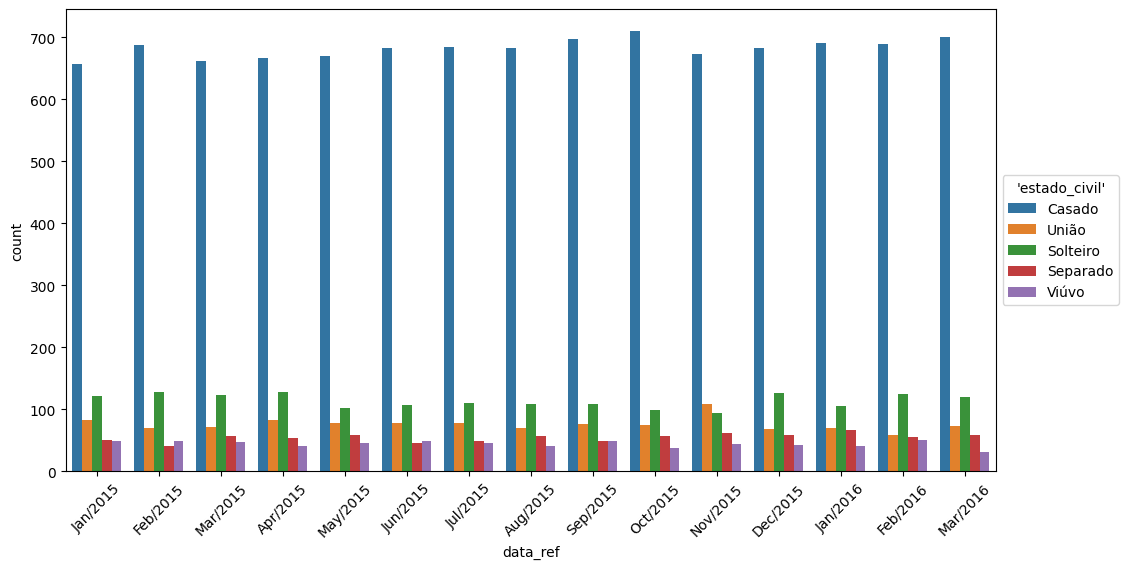

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


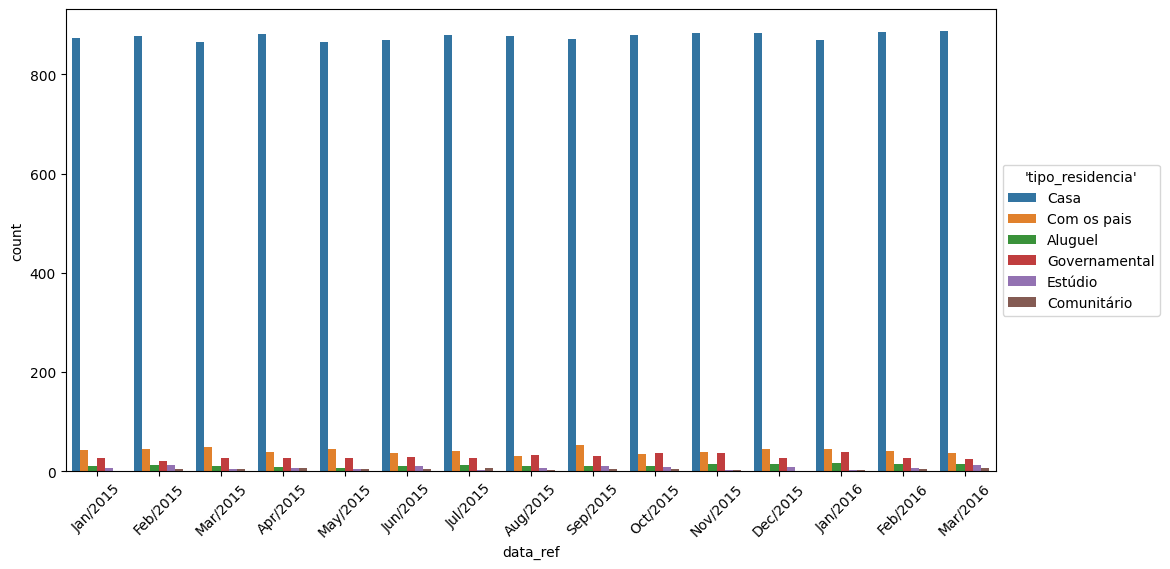

<ipython-input-34-e4bc05eed9b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tick_labels, rotation=45)


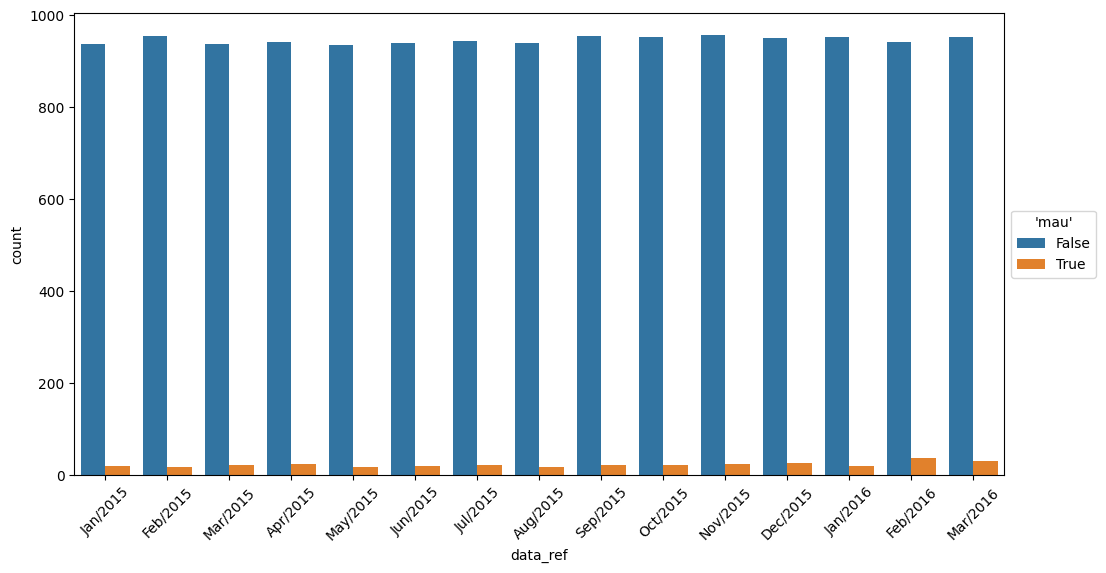

In [34]:
plt.rc('figure', figsize=(12,6))

for col in quali:
    ax = sns.countplot(x='data_ref', hue=col, data=df)
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    ax.set_xticklabels(labels=tick_labels, rotation=45)
    ax.legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

Resposta:

Dentre todos os gráficos apresentados, uma das variáveis qualitativas que se destaca das demais é a escolaridade

 Ao longo do tempo, houve um aumento importante dos dados com a escolaridade de ensino superior completo, isso levou a uma queda na quantidade de dados com a escolaridade colegial.

**2)** **Para cada variável qualitativa, construa um gráfico mostrando as médias de
cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?**  

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


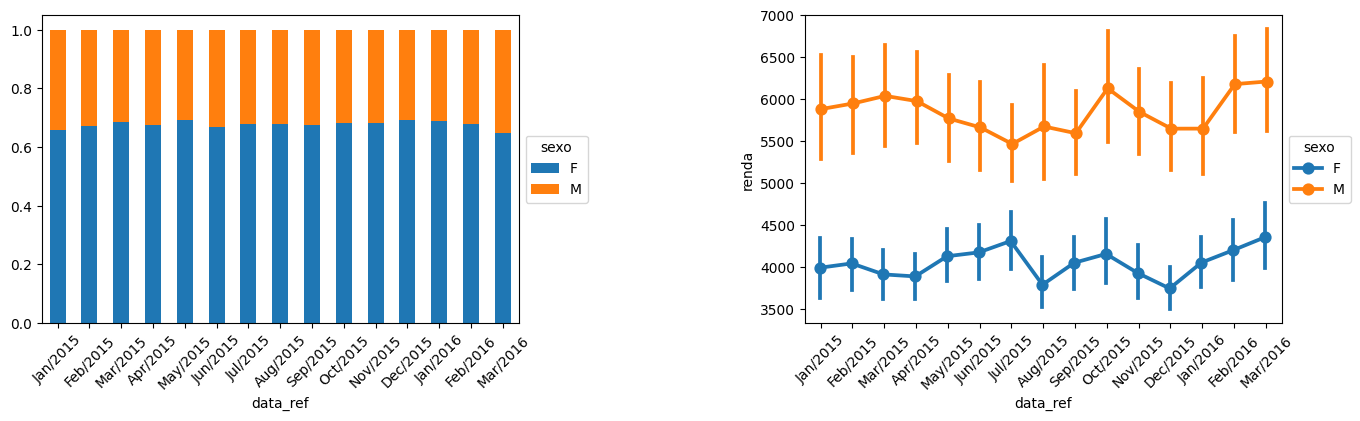

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


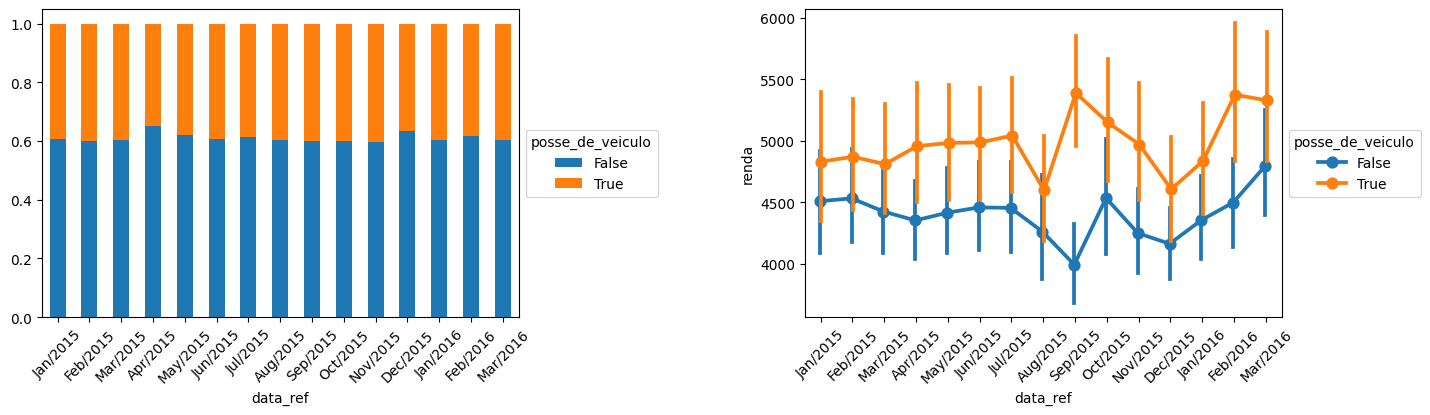

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


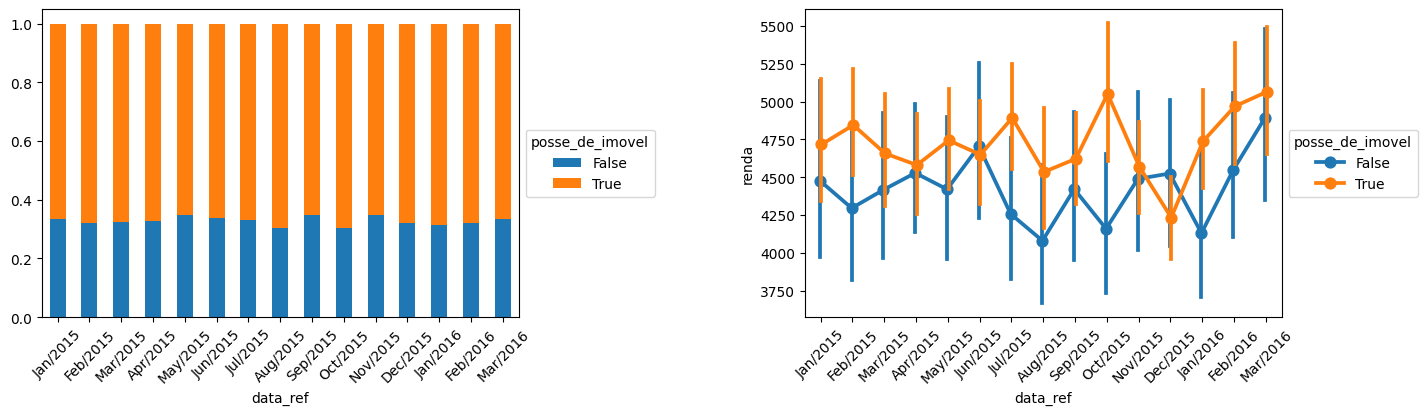

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


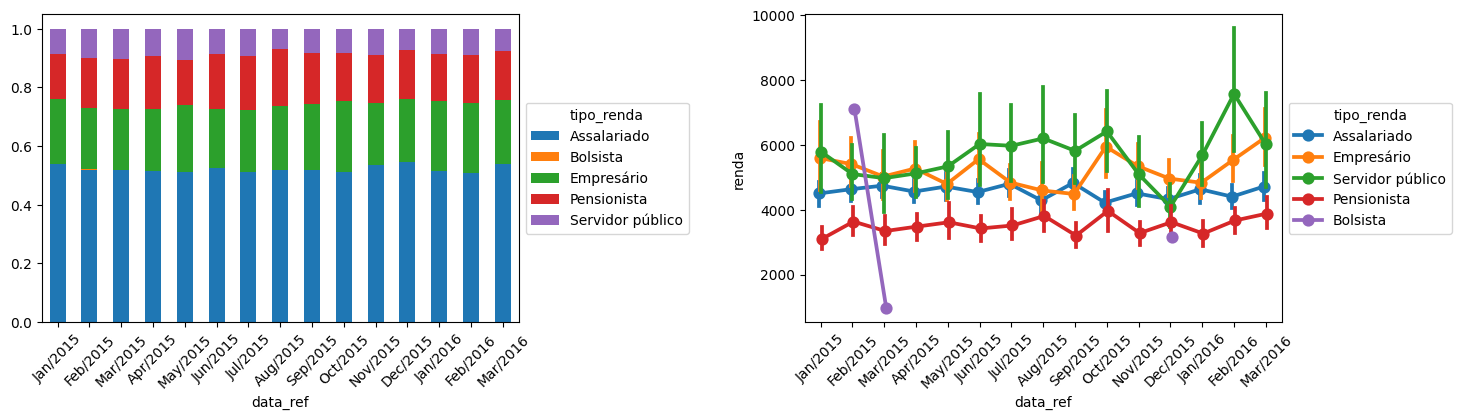

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


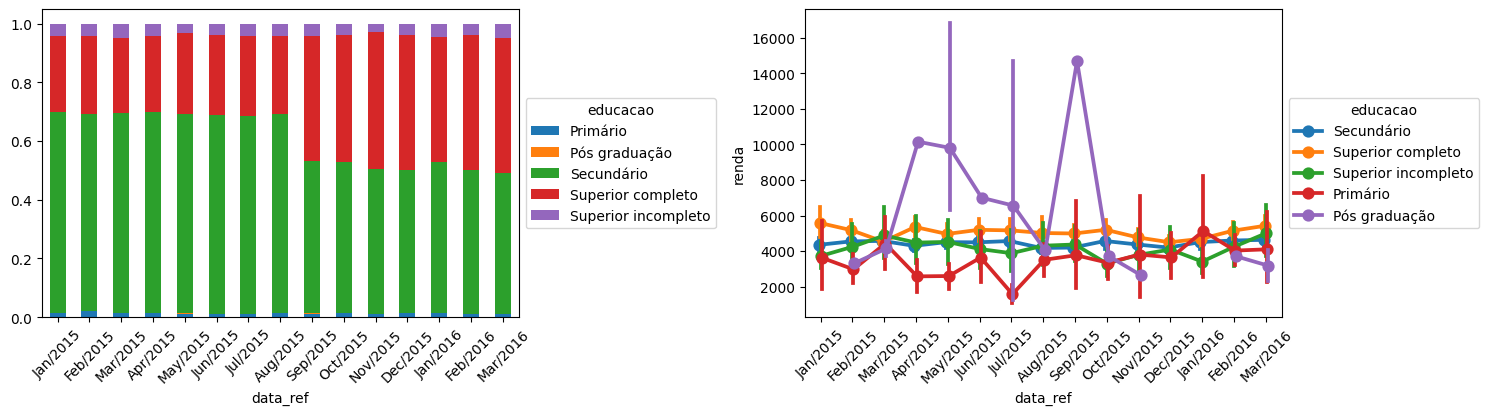

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


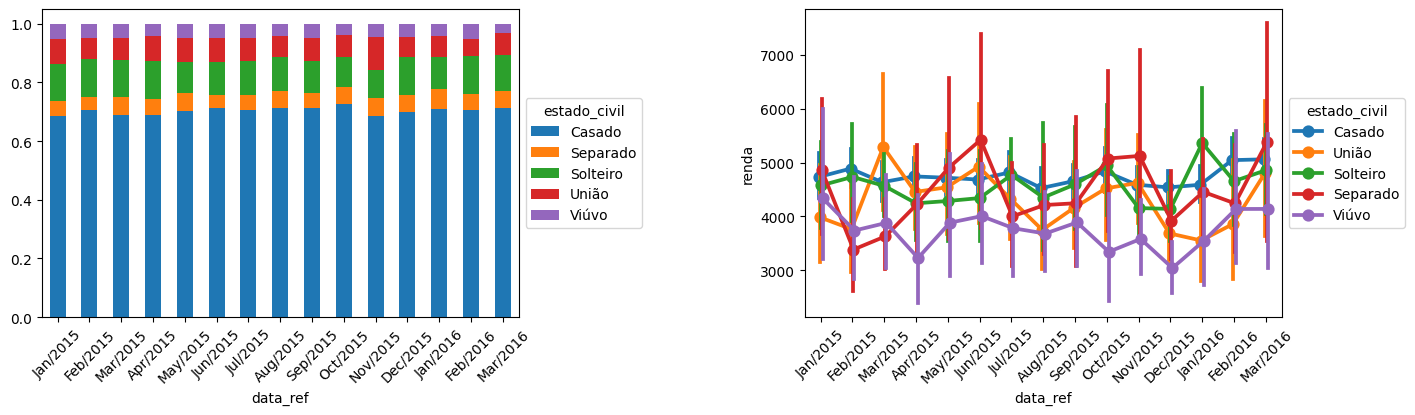

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


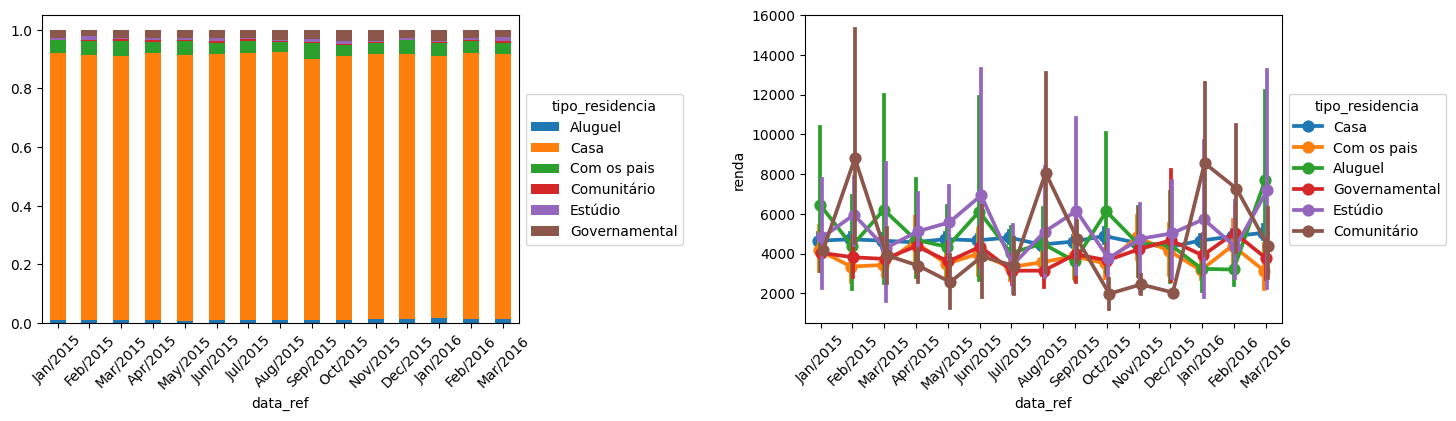

<ipython-input-35-fd58f4753a80>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(tick_labels, rotation=45)


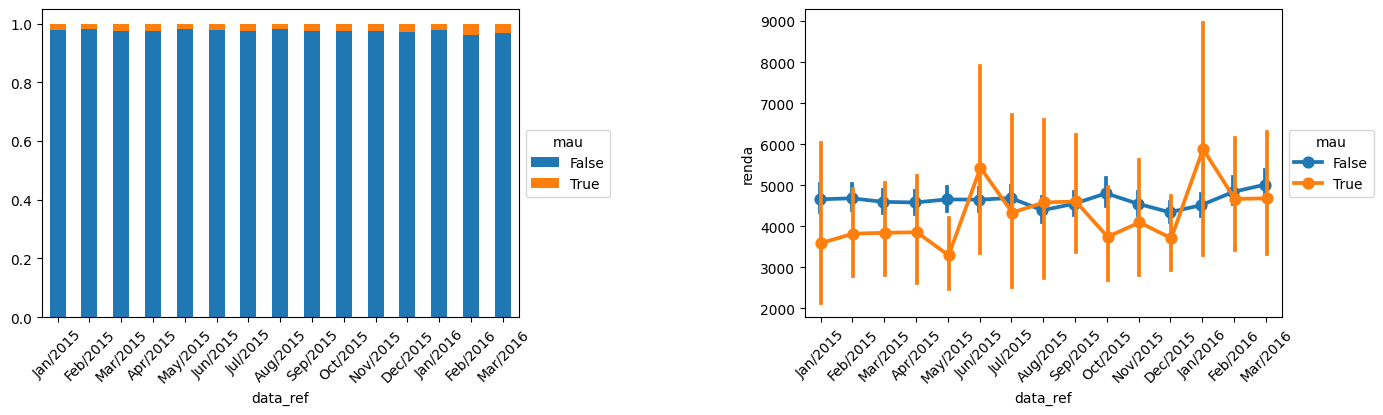

In [35]:
plt.rc('figure', figsize=(16,4))

for col in quali:
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    fig.subplots_adjust(wspace=0.6)

    # X stick
    tick_labels = df['data_ref'].dt.strftime('%b/%Y').unique()

    # barras empilhadas:
    (df.groupby(['data_ref', col]).size() / df.groupby('data_ref').size()) \
        .unstack().plot.bar(stacked=True, ax=axes[0])
    axes[0].set_xticklabels(tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, 0.5), loc=6, title=col)

    # Intervalo de confiança
    sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, errorbar=('ci', 95), ax=axes[1])
    axes[1].set_xticklabels(tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, 0.5), loc=6, title=col)

    plt.show()

Resposta:

Apenas a variável escolaridade, apresentou alteração ao longo do tempo creio que as demais variáveis qualitativas têm potencial para serem utilizadas em uma modelage pela sua estabilidade ao longo do período analisado.

